In [215]:
import sys
import os

# Get the current directory of the notebook
notebook_dir = os.path.abspath('')
_dir = os.path.dirname(notebook_dir)
_dir = os.path.dirname(_dir)
_dir = os.path.dirname(_dir)
sys.path.append(_dir)

<hr />

## 242.g

In [216]:
from util import excel_table
from util.structs import DataCluster, Dataset, Measurement;
import numpy as np;

table = excel_table.read("./data/242f")
header = table[0]
print(header)
table = table[1:]
data = DataCluster();

time_uncertainty = 0.5;
distance_uncertainty = 0.1

for row in table:
    # print(row, row[4])
    data.add(Dataset({
        "i": row[0],
        "t_u": Measurement(row[1], time_uncertainty),
        "t_0": Measurement(row[2], time_uncertainty),
        "t_d": Measurement(row[3], time_uncertainty),
        "s": Measurement(row[4], distance_uncertainty) * 1e-3
    }))

data = data.filter_null("i");
data.print_2()


['#' 't_up' 't_0' 't_down' 's [mm]' None]
i  | s                    | t_0                  | t_d                  | t_u                 
---+----------------------+----------------------+----------------------+---------------------
1  | ( 10.0 ± 1.0)e-4 [·] | ( 38.1 ± 5.0)e-1 [·] | ( 22.4 ± 5.0)e-1 [·] | ( 73.9 ± 5.0)e-1 [·]
2  | ( 10.0 ± 1.0)e-4 [·] | ( 12.5 ± 5.0)e-1 [·] | (  2.3 ± 5.0)e-1 [·] | ( 27.0 ± 5.0)e-1 [·]
3  | ( 10.0 ± 1.0)e-4 [·] | ( 22.2 ± 5.0)e-1 [·] | ( 11.2 ± 5.0)e-1 [·] | ( 30.5 ± 5.0)e-1 [·]
4  | ( 10.0 ± 1.0)e-4 [·] | ( 51.0 ± 5.0)e-1 [·] | ( 28.0 ± 5.0)e-1 [·] | (104.4 ± 5.0)e-1 [·]
5  | ( 10.0 ± 1.0)e-4 [·] | ( 35.2 ± 5.0)e-1 [·] | ( 16.5 ± 5.0)e-1 [·] | ( 30.2 ± 5.0)e-1 [·]
6  | (  5.0 ± 1.0)e-4 [·] | ( 27.9 ± 5.0)e-1 [·] | ( 10.7 ± 5.0)e-1 [·] | ( 24.8 ± 5.0)e-1 [·]
6  | (  5.0 ± 1.0)e-4 [·] | ( 33.2 ± 5.0)e-1 [·] | ( 11.5 ± 5.0)e-1 [·] | ( 25.3 ± 5.0)e-1 [·]
6  | (  5.0 ± 1.0)e-4 [·] | ( 22.3 ± 5.0)e-1 [·] | (  9.3 ± 5.0)e-1 [·] | ( 22.0 ± 5.0)e-1 [·]
6  | (  

In [217]:
for d in data:
    d["v_u"] = d["s"] / d["t_u"];
    d["v_0"] = d["s"] / d["t_0"];
    d["v_d"] = d["s"] / d["t_d"];

data.round_index("v_u", additional_digits=1)
data.round_index("v_0", additional_digits=1)
data.round_index("v_d", additional_digits=1)

data.print_2();

i  | s                    | t_0                  | t_d                  | t_u                  | v_0                  | v_d                  | v_u                 
---+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+---------------------
1  | ( 10.0 ± 1.0)e-4 [·] | ( 38.1 ± 5.0)e-1 [·] | ( 22.4 ± 5.0)e-1 [·] | ( 73.9 ± 5.0)e-1 [·] | ( 26.2 ± 4.4)e-5 [·] | (  4.5 ± 1.1)e-4 [·] | ( 13.5 ± 1.7)e-5 [·]
2  | ( 10.0 ± 1.0)e-4 [·] | ( 12.5 ± 5.0)e-1 [·] | (  2.3 ± 5.0)e-1 [·] | ( 27.0 ± 5.0)e-1 [·] | (  8.0 ± 3.3)e-4 [·] | (  4.3 ± 9.5)e-3 [·] | ( 37.0 ± 7.8)e-5 [·]
3  | ( 10.0 ± 1.0)e-4 [·] | ( 22.2 ± 5.0)e-1 [·] | ( 11.2 ± 5.0)e-1 [·] | ( 30.5 ± 5.0)e-1 [·] | (  4.5 ± 1.2)e-4 [·] | (  8.9 ± 4.1)e-4 [·] | ( 32.8 ± 6.3)e-5 [·]
4  | ( 10.0 ± 1.0)e-4 [·] | ( 51.0 ± 5.0)e-1 [·] | ( 28.0 ± 5.0)e-1 [·] | (104.4 ± 5.0)e-1 [·] | ( 19.6 ± 2.8)e-5 [·] | ( 35.7 ± 7.4)e-5 [·] | (  9.6 ± 1.1)e-5 [·]
5  | ( 10.0 ± 1.

Es soll dabei für die Geschwindigkeiten gelten:

$$
2v_0 = v_\downarrow - v_\uparrow
\tag{242.10}
$$

In [218]:
for d in data:
    d["2v_0"] = 2 * d["v_0"];
    d["v_d - v_u"] = d["v_d"] - d["v_u"];
    d["2v_0 - v_d + v_u"] = d["2v_0"] - d["v_d - v_u"]

data.round_index("2v_0")
data.round_index("v_d - v_u")
data.round_index("2v_0 - v_d + v_u")

for d in data:
    value = d["2v_0 - v_d + v_u"].value
    d["took"] = str(value < d["2v_0"].error or value < d["v_d - v_u"].error)

data.print_2();
data.save_to_excel_measurements("./output/242g_all")
print(data[1])

2v_0                 | 2v_0 - v_d + v_u     | i  | s                    | t_0                  | t_d                  | t_u                  | took  | v_0                  | v_d                  | v_d - v_u            | v_u                 
---------------------+----------------------+----+----------------------+----------------------+----------------------+----------------------+-------+----------------------+----------------------+----------------------+---------------------
( 52.0 ± 9.0)e-5 [·] | (  2.0 ± 2.0)e-4 [·] | 1  | ( 10.0 ± 1.0)e-4 [·] | ( 38.1 ± 5.0)e-1 [·] | ( 22.4 ± 5.0)e-1 [·] | ( 73.9 ± 5.0)e-1 [·] | False | ( 26.2 ± 4.4)e-5 [·] | (  4.5 ± 1.1)e-4 [·] | (  3.0 ± 2.0)e-4 [·] | ( 13.5 ± 1.7)e-5 [·]
( 16.0 ± 7.0)e-4 [·] | ( -0.2 ± 1.0)e-2 [·] | 2  | ( 10.0 ± 1.0)e-4 [·] | ( 12.5 ± 5.0)e-1 [·] | (  2.3 ± 5.0)e-1 [·] | ( 27.0 ± 5.0)e-1 [·] | True  | (  8.0 ± 3.3)e-4 [·] | (  4.3 ± 9.5)e-3 [·] | (  0.4 ± 1.0)e-2 [·] | ( 37.0 ± 7.8)e-5 [·]
(  9.0 ± 3.0)e-4 [·] | (  3.0 ± 5.0)

In [219]:
# Filter Data
data[1]["took"] = "False";

print(len(data))
data = data.filter("took", "True");
data = data.copy_remove_index("took")
print(len(data))

# mean same droplet
new_data = DataCluster();

for i in set(data.column("i")):
    new_set = data.filter("i",i).data_mean()
    new_data.add(new_set)

new_data = new_data.copy_remove_index("took")
new_data.print_2()
data = new_data
data.save_to_excel_measurements("./output/242g_mean")

45
34
2v_0                 | 2v_0 - v_d + v_u     | i                    | s                    | t_0                  | t_d                  | t_u                  | v_0                  | v_d                  | v_d - v_u            | v_u                 
---------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+---------------------
(  9.0 ± 3.0)e-4 [·] | (  3.0 ± 5.0)e-4 [·] | (  3.0 ± 0.0)    [·] | ( 10.0 ± 1.0)e-4 [·] | ( 22.2 ± 5.0)e-1 [·] | ( 11.2 ± 5.0)e-1 [·] | ( 30.5 ± 5.0)e-1 [·] | (  4.5 ± 1.2)e-4 [·] | (  8.9 ± 4.1)e-4 [·] | (  6.0 ± 5.0)e-4 [·] | ( 32.8 ± 6.3)e-5 [·]
( 34.6 ± 5.4)e-5 [·] | (  0.8 ± 1.4)e-4 [·] | (  6.0 ± 0.0)    [·] | ( 50.0 ± 4.5)e-5 [·] | ( 28.8 ± 2.2)e-1 [·] | ( 10.6 ± 2.2)e-1 [·] | ( 25.2 ± 2.2)e-1 [·] | ( 17.7 ± 2.2)e-5 [·] | (  4.7 ± 1.1)e-4 [·] | (  2.6 ± 1.4)e-4 [·] | ( 20.4 ± 2.

Näherungsweise Bestimmung der Gesamtladung auf den Tröpfchen und des Teilchenradius ohne Cunningham-Korrektur:

### 242.g1

Aus der Zimmertemperatur wird die Viskosität der Luft durch Interpolation der Werte in Tabelle 242.1 bestimmt. 

In [220]:
# Angaben der Viksokität bei T
T_data_points = [0, 20, 40]
eta_data_points = [17.20e-6, 18.19e-6, 19.12e-6]

m: (480.0 ± 8.7)e-10 [·], n: (1721.0 ± 2.2)e-8 [·]


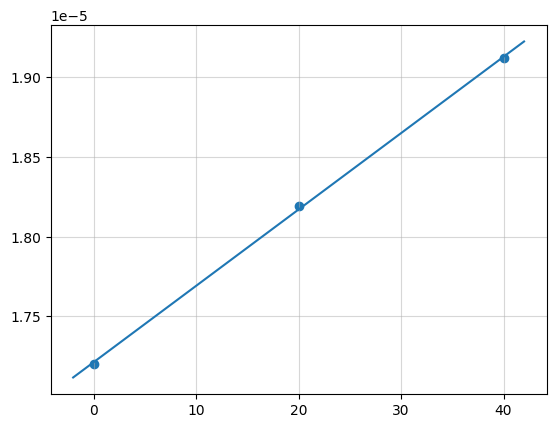

In [221]:
from util import graph_fit
from util import graph;
import matplotlib.pyplot as plt

plot = plt.subplots();
fig, ax = plot;

ax.grid(alpha=.5)

func, params = graph_fit.Linear.perform_fit(T_data_points, eta_data_points)
graph.scatter(T_data_points, eta_data_points, plot=plot, label="given Points")
graph.plot_func(func, plot=plot)

print(params)


In [222]:

gemessene_Temp = Measurement(24, 1);

eta_Luft = func(gemessene_Temp);
print(eta_Luft)

(1836.2 ± 4.8)e-8 [·]


### 242.g2

Dann wird mit den Gleichungen 242.8 und 242.9 die ungefähre Ladung $𝑞_{S,i}$ und der Radius $r_i$ mit der unkorrigierten Stokesschen Viskositätsformel (d.h. mit $𝜂_{Luft}$ anstatt mit 𝜂eff) aus den gemessenen Geschwindigkeiten für jedes Tröpfchen i berechnet.

In [223]:
data = data.copy_remove_index("2v_0")
data = data.copy_remove_index("2v_0 - v_d + v_u")
data = data.copy_remove_index("v_d - v_u")
data = data.copy_remove_index("s")
data = data.copy_remove_index("t_0")
data = data.copy_remove_index("t_d")
data = data.copy_remove_index("t_u")
data = data.copy_remove_index("v_0")
data.print_2();

i                    | v_d                  | v_u                 
---------------------+----------------------+---------------------
(  3.0 ± 0.0)    [·] | (  8.9 ± 4.1)e-4 [·] | ( 32.8 ± 6.3)e-5 [·]
(  6.0 ± 0.0)    [·] | (  4.7 ± 1.1)e-4 [·] | ( 20.4 ± 2.7)e-5 [·]
(  7.0 ± 0.0)    [·] | (  3.9 ± 1.1)e-4 [·] | ( 13.7 ± 2.9)e-5 [·]
(  8.0 ± 0.0)    [·] | (  5.7 ± 3.5)e-4 [·] | ( 26.0 ± 8.6)e-5 [·]
(  9.0 ± 0.0)    [·] | ( 23.5 ± 7.3)e-5 [·] | ( 18.4 ± 5.0)e-5 [·]
( 10.0 ± 0.0)    [·] | ( 19.6 ± 2.5)e-5 [·] | ( 79.2 ± 7.9)e-6 [·]
( 11.0 ± 0.0)    [·] | ( 18.2 ± 5.0)e-5 [·] | ( 12.6 ± 3.0)e-5 [·]
( 12.0 ± 0.0)    [·] | (  6.1 ± 1.9)e-4 [·] | ( 33.8 ± 7.2)e-5 [·]
( 13.0 ± 0.0)    [·] | ( 32.5 ± 5.9)e-5 [·] | ( 26.4 ± 4.0)e-5 [·]
( 14.0 ± 0.0)    [·] | ( 11.1 ± 7.0)e-4 [·] | ( 27.7 ± 4.4)e-5 [·]



$$
r = \sqrt{ 
    \frac
        {9\eta_{Luft} (v_{\downarrow} - v_{\uparrow})}
        {4g (\rho_{Öl} - \rho_{Luft})
    }}
\tag{242.8}
$$

In [224]:
rho_oil = 886
rho_Luft = 1.225
g = 9.81

def calc_r(v_up, v_down):
    a = 9 * eta_Luft * (v_down - v_up)
    b = 4 * 9.81 * (rho_oil - rho_Luft)
    return (a / b)**.5

In [225]:
for d in data:
    d["r"] = calc_r(d["v_u"], d["v_d"])

data.round_index("r")

data.print_2();

i                    | r                    | v_d                  | v_u                 
---------------------+----------------------+----------------------+---------------------
(  3.0 ± 0.0)    [·] | ( 16.0 ± 7.0)e-7 [·] | (  8.9 ± 4.1)e-4 [·] | ( 32.8 ± 6.3)e-5 [·]
(  6.0 ± 0.0)    [·] | ( 11.0 ± 3.0)e-7 [·] | (  4.7 ± 1.1)e-4 [·] | ( 20.4 ± 2.7)e-5 [·]
(  7.0 ± 0.0)    [·] | ( 11.0 ± 3.0)e-7 [·] | (  3.9 ± 1.1)e-4 [·] | ( 13.7 ± 2.9)e-5 [·]
(  8.0 ± 0.0)    [·] | ( 12.0 ± 8.0)e-7 [·] | (  5.7 ± 3.5)e-4 [·] | ( 26.0 ± 8.6)e-5 [·]
(  9.0 ± 0.0)    [·] | (  5.0 ± 5.0)e-7 [·] | ( 23.5 ± 7.3)e-5 [·] | ( 18.4 ± 5.0)e-5 [·]
( 10.0 ± 0.0)    [·] | ( 74.0 ± 9.0)e-8 [·] | ( 19.6 ± 2.5)e-5 [·] | ( 79.2 ± 7.9)e-6 [·]
( 11.0 ± 0.0)    [·] | (  5.0 ± 3.0)e-7 [·] | ( 18.2 ± 5.0)e-5 [·] | ( 12.6 ± 3.0)e-5 [·]
( 12.0 ± 0.0)    [·] | ( 11.0 ± 5.0)e-7 [·] | (  6.1 ± 1.9)e-4 [·] | ( 33.8 ± 7.2)e-5 [·]
( 13.0 ± 0.0)    [·] | (  5.0 ± 4.0)e-7 [·] | ( 32.5 ± 5.9)e-5 [·] | ( 26.4 ± 4.0)e-5 [·]
( 14.0 ± 0

$$
q_{S,i} = 3\pi \eta_{Luft} (v_{\downarrow}+v_{\uparrow}) r \frac{d}{U}
$$

In [226]:
U = Measurement(505, 6);
plattenabstand = Measurement(7.75, 0.08) * 1e-3;

def calc_q(v_up, v_down, r):
    return 3 * np.pi * eta_Luft * (v_down + v_up) * r * plattenabstand / U;

In [227]:
# calc the charge Ne for 
for d in data:
    d["q_{S,i}"] = calc_q(d["v_u"], d["v_d"], d["r"])

data.round_index("q_{S,i}", additional_digits=1)

data.print_2();
data.save_to_excel_measurements("./output/242g_rq")

i                    | q_{S,i}               | r                    | v_d                  | v_u                 
---------------------+-----------------------+----------------------+----------------------+---------------------
(  3.0 ± 0.0)    [·] | (  5.2 ± 2.9)e-18 [·] | ( 16.0 ± 7.0)e-7 [·] | (  8.9 ± 4.1)e-4 [·] | ( 32.8 ± 6.3)e-5 [·]
(  6.0 ± 0.0)    [·] | ( 19.8 ± 6.4)e-19 [·] | ( 11.0 ± 3.0)e-7 [·] | (  4.7 ± 1.1)e-4 [·] | ( 20.4 ± 2.7)e-5 [·]
(  7.0 ± 0.0)    [·] | ( 15.3 ± 5.3)e-19 [·] | ( 11.0 ± 3.0)e-7 [·] | (  3.9 ± 1.1)e-4 [·] | ( 13.7 ± 2.9)e-5 [·]
(  8.0 ± 0.0)    [·] | (  2.6 ± 2.2)e-18 [·] | ( 12.0 ± 8.0)e-7 [·] | (  5.7 ± 3.5)e-4 [·] | ( 26.0 ± 8.6)e-5 [·]
(  9.0 ± 0.0)    [·] | (  5.6 ± 5.7)e-19 [·] | (  5.0 ± 5.0)e-7 [·] | ( 23.5 ± 7.3)e-5 [·] | ( 18.4 ± 5.0)e-5 [·]
( 10.0 ± 0.0)    [·] | ( 54.0 ± 8.4)e-20 [·] | ( 74.0 ± 9.0)e-8 [·] | ( 19.6 ± 2.5)e-5 [·] | ( 79.2 ± 7.9)e-6 [·]
( 11.0 ± 0.0)    [·] | (  4.1 ± 2.6)e-19 [·] | (  5.0 ± 3.0)e-7 [·] | ( 18.2 ± 5.0)e-5 [

## 242.h

Bestimmung der Anzahl 𝑁𝑖 der Ladungen auf den Tröpfchen: Man suche den größten gemeinsamen Teiler für alle gefundenen Ladungen 𝑞S,𝑖. Damit kennt man die ganzahlige Anzahl 𝑁𝑖 der Elementarladungen auf jedem Teilchen und erhält so eine Reihe von ungefähren Werten 𝑒S,𝑖 = 𝑞S,𝑖/𝑁𝑖 für die Elementarladung. Tipp: Hierfür kann es nützlich sein, die Daten graphisch aufzutragen.

[4.1e-19, 5.4e-19, 5.6e-19, 7.8e-19, 1.53e-18, 1.98e-18, 2.6e-18, 2.8e-18, 5.2e-18, 7.4e-18]


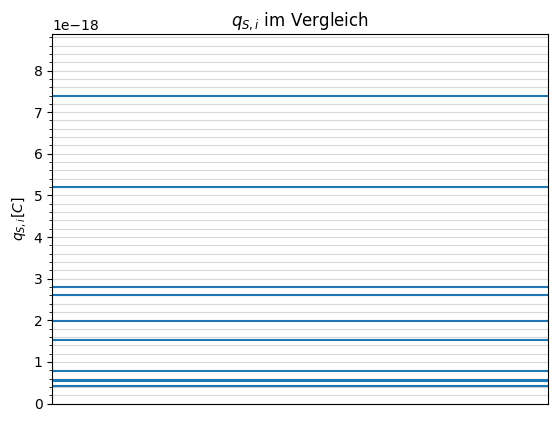

In [228]:
from matplotlib.ticker import AutoMinorLocator

plot = plt.subplots();
fig,ax = plot

ax.set_title(r"$q_{S,i}$ im Vergleich");

y_values = data.values("q_{S,i}");
y_max = np.max(y_values)

ax.yaxis.set_minor_locator(AutoMinorLocator(5))  # 2 minor ticks between major ticks
ax.set_ylabel(r"$q_{S,i} [C]$")
ax.set_ylim(0, 1.2 * y_max)
ax.set_xticks([])
ax.grid(axis='y', alpha=0.5, which="both")

print(sorted(y_values))

for y in y_values:
    ax.axhline(y)

fig.savefig("./output/242h")
fig.savefig("./pdf/plot_242h.pdf")

In [229]:
data = data.copy_remove_index("v_d")
data = data.copy_remove_index("v_u")

ggT = 1.5e-19

for d in data:
    d["N"] = (d["q_{S,i}"] / ggT).round_digit()

data.print_2()

N                    | i                    | q_{S,i}               | r                   
---------------------+----------------------+-----------------------+---------------------
(  3.5 ± 2.0)e+1 [·] | (  3.0 ± 0.0)    [·] | (  5.2 ± 2.9)e-18 [·] | ( 16.0 ± 7.0)e-7 [·]
( 13.0 ± 5.0)    [·] | (  6.0 ± 0.0)    [·] | ( 19.8 ± 6.4)e-19 [·] | ( 11.0 ± 3.0)e-7 [·]
( 10.0 ± 4.0)    [·] | (  7.0 ± 0.0)    [·] | ( 15.3 ± 5.3)e-19 [·] | ( 11.0 ± 3.0)e-7 [·]
(  1.7 ± 1.5)e+1 [·] | (  8.0 ± 0.0)    [·] | (  2.6 ± 2.2)e-18 [·] | ( 12.0 ± 8.0)e-7 [·]
(  4.0 ± 4.0)    [·] | (  9.0 ± 0.0)    [·] | (  5.6 ± 5.7)e-19 [·] | (  5.0 ± 5.0)e-7 [·]
(  4.0 ± 1.0)    [·] | ( 10.0 ± 0.0)    [·] | ( 54.0 ± 8.4)e-20 [·] | ( 74.0 ± 9.0)e-8 [·]
(  3.0 ± 2.0)    [·] | ( 11.0 ± 0.0)    [·] | (  4.1 ± 2.6)e-19 [·] | (  5.0 ± 3.0)e-7 [·]
(  1.9 ± 1.0)e+1 [·] | ( 12.0 ± 0.0)    [·] | (  2.8 ± 1.4)e-18 [·] | ( 11.0 ± 5.0)e-7 [·]
(  5.0 ± 5.0)    [·] | ( 13.0 ± 0.0)    [·] | (  7.8 ± 6.4)e-19 [·] | (  5.0 ± 4.0)e-7 [·]

In [230]:
for d in data:
    d["e_{S,i}"] = d["q_{S,i}"] / d["N"]

data.print_2()
data.save_to_excel_measurements("./output/242h")

N                    | e_{S,i}               | i                    | q_{S,i}               | r                   
---------------------+-----------------------+----------------------+-----------------------+---------------------
(  3.5 ± 2.0)e+1 [·] | (  1.5 ± 1.2)e-19 [·] | (  3.0 ± 0.0)    [·] | (  5.2 ± 2.9)e-18 [·] | ( 16.0 ± 7.0)e-7 [·]
( 13.0 ± 5.0)    [·] | ( 15.2 ± 7.7)e-20 [·] | (  6.0 ± 0.0)    [·] | ( 19.8 ± 6.4)e-19 [·] | ( 11.0 ± 3.0)e-7 [·]
( 10.0 ± 4.0)    [·] | ( 15.3 ± 8.1)e-20 [·] | (  7.0 ± 0.0)    [·] | ( 15.3 ± 5.3)e-19 [·] | ( 11.0 ± 3.0)e-7 [·]
(  1.7 ± 1.5)e+1 [·] | (  1.5 ± 1.9)e-19 [·] | (  8.0 ± 0.0)    [·] | (  2.6 ± 2.2)e-18 [·] | ( 12.0 ± 8.0)e-7 [·]
(  4.0 ± 4.0)    [·] | (  1.4 ± 2.0)e-19 [·] | (  9.0 ± 0.0)    [·] | (  5.6 ± 5.7)e-19 [·] | (  5.0 ± 5.0)e-7 [·]
(  4.0 ± 1.0)    [·] | ( 13.5 ± 4.0)e-20 [·] | ( 10.0 ± 0.0)    [·] | ( 54.0 ± 8.4)e-20 [·] | ( 74.0 ± 9.0)e-8 [·]
(  3.0 ± 2.0)    [·] | (  1.4 ± 1.3)e-19 [·] | ( 11.0 ± 0.0)    [·] | (  4.1 ± 2

### 242.i

Anbringen der Cunningham-Korrektur: Aus den Gleichungen 242.8 und 242.9 kann man ableiten, dass die unkorrigierten Werte 𝑒S,𝑖 für die Elementarladungen mit dem korrigiertem Wert 𝑒0 durch 𝑒0 = 𝑒S,𝑖 ×  1 + 𝐴 𝑟𝑖 − 3 2 (242.11) verbunden sind. Umgestellt lautet Gleichung 242.11 (𝑒S,𝑖) 2 3 = (𝑒0) 2 3 ×  1 + 𝐴 𝑟𝑖  . (242.12) Ein Graph von (𝑒S,𝑖)2/3 gegen 1/𝑟𝑖 ergibt eine Gerade, aus deren Achsenabschnitt man die gesuchte Elementarladung 𝑒0 bestimmt. Der Graph bietet gleichzeitig eine augenfällige Kon- trolle, ob man die Anzahl 𝑁𝑖 auf den einzelnen Tröpfchen richtig bestimmt hat

In [231]:

for d in data:
    d["e_{S,i}^2/3"] = d["e_{S,i}"]**(2/3)
    d["1/r"] = 1 / d["r"]

data.print_2();
data.save_to_excel_measurements("./output/242i")

1/r                  | N                    | e_{S,i}               | e_{S,i}^2/3           | i                    | q_{S,i}               | r                   
---------------------+----------------------+-----------------------+-----------------------+----------------------+-----------------------+---------------------
(  6.2 ± 2.7)e+5 [·] | (  3.5 ± 2.0)e+1 [·] | (  1.5 ± 1.2)e-19 [·] | (  2.8 ± 1.5)e-13 [·] | (  3.0 ± 0.0)    [·] | (  5.2 ± 2.9)e-18 [·] | ( 16.0 ± 7.0)e-7 [·]
(  9.1 ± 2.5)e+5 [·] | ( 13.0 ± 5.0)    [·] | ( 15.2 ± 7.7)e-20 [·] | ( 28.5 ± 9.6)e-14 [·] | (  6.0 ± 0.0)    [·] | ( 19.8 ± 6.4)e-19 [·] | ( 11.0 ± 3.0)e-7 [·]
(  9.1 ± 2.5)e+5 [·] | ( 10.0 ± 4.0)    [·] | ( 15.3 ± 8.1)e-20 [·] | (  2.9 ± 1.0)e-13 [·] | (  7.0 ± 0.0)    [·] | ( 15.3 ± 5.3)e-19 [·] | ( 11.0 ± 3.0)e-7 [·]
(  8.3 ± 5.6)e+5 [·] | (  1.7 ± 1.5)e+1 [·] | (  1.5 ± 1.9)e-19 [·] | (  2.9 ± 2.3)e-13 [·] | (  8.0 ± 0.0)    [·] | (  2.6 ± 2.2)e-18 [·] | ( 12.0 ± 8.0)e-7 [·]
(  2.0 ± 2.0)e+6 [·] | (  4.

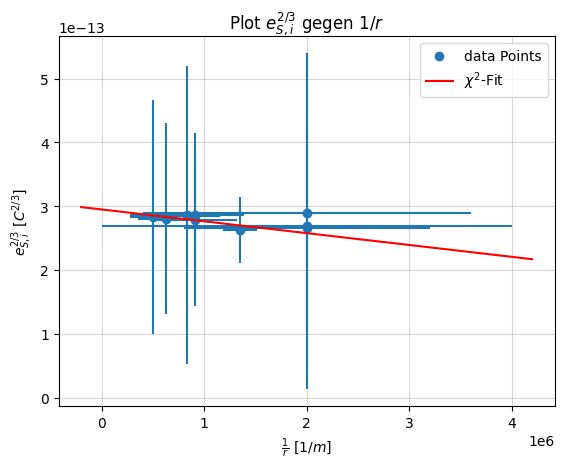

In [232]:

plot = plt.subplots();
fig, ax = plot;

ax.grid(alpha=.5)
ax.set_title(r"Plot $e_{S,i}^{2/3}$ gegen $1/r$")
ax.set_ylabel(r"$e_{S,i}^{2/3}~[C^{2/3}]$")
ax.set_xlabel(r"$\frac{1}{r}~[1/m]$")

func, params = graph_fit.Linear.on_data(data, "1/r", "e_{S,i}^2/3")
graph.scatter_data(data, "1/r", "e_{S,i}^2/3", plot=plot, label="data Points")
graph.plot_func(func, plot, color="red", label=r"$\chi^2$-Fit")

ax.legend();

fig.savefig("./output/242i")
fig.savefig("./pdf/plot_242i.pdf")

In [233]:
print(params)
e_0 = params["n"]**(3/2);

print(e_0)

m: ( -1.9 ± 9.7)e-20 [·], n: (  2.9 ± 1.2)e-13 [·]
( 16.0 ± 9.7)e-20 [·]


### 242.k

In [234]:
e_m = Measurement(21.5, 6.3) * 1e10;

In [235]:
print(e_0 / e_m);


(  7.5 ± 5.0)e-31 [·]
